# Bibliotecas

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [231]:
# suppressing scientific notation
np.set_printoptions(suppress=True)

# desabilita warning
warnings.filterwarnings("ignore")

# Dataframe

In [232]:
df = pd.read_excel('pnad_10.xlsx')

In [233]:
df.head()

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,Númerodeselecaododomicílio,Painel,Númerodaentrevistanodomicílio,...,Rendim.efetivoqqtrabalho,Pqñññtrab,Pqñññtrab_A,Hrshabituaisemtodostrab,Hrsefetivasnotrab.princ_A,Hrsefetivasnotrab.secun_A,Hrsefetivasnosoutrostrab_A,Hrsefetivasemtodostrab,Faixahrshabituaistrab.princ,Faixahrsefetivastrab.princ
0,2018,4,Rondônia,Município de Porto Velho (RO),NaN,110000016,1110011,3,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,Rondônia,Município de Porto Velho (RO),NaN,110000016,1110011,4,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,Rondônia,Município de Porto Velho (RO),NaN,110000016,1110011,6,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,Rondônia,Município de Porto Velho (RO),NaN,110000016,1110011,8,6,5,...,NaN,NaN,Estava estudando,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,Rondônia,Município de Porto Velho (RO),NaN,110000016,1110011,9,6,5,...,1300.0,NaN,NaN,40.0,NaN,NaN,NaN,40.0,40 a 44 horas,40 a 44 horas


# Renda e Condições Socioeconômicas

Análise de Renda e Condições Socioeconômicas:

- Média salarial por UF e Capital
- Distribuição de renda por faixa etária
- Distribuição de renda por gênero
- Distribuição de renda por nível de educação
- Renda por tipo de ocupação
- Renda por setor de atividade econômica

In [234]:
df_socioeconomico = df[['Valordorend.hab.emdinheiro', 'Níveldeinstrução', 'Idadenadatadereferência', 'Corouraça', 'Sexo', 'UF']]
df_socioeconomico = df_socioeconomico.dropna().reset_index(drop = True)
df_socioeconomico

,Valordorend.hab.emdinheiro,Níveldeinstrução,Idadenadatadereferência,Corouraça,Sexo,UF
0,1300.0,Médio completo ou equivalente,27,Parda,Homem,Rondônia
1,900.0,Superior incompleto ou equivalente,24,Parda,Mulher,Rondônia
2,2400.0,Médio completo ou equivalente,39,Parda,Mulher,Rondônia
3,7000.0,Superior completo,42,Parda,Homem,Rondônia
4,2000.0,Médio completo ou equivalente,36,Parda,Mulher,Rondônia
...,...,...,...,...,...,...
22384,965.0,Fundamental incompleto ou equivalente,15,Preta,Homem,Distrito Federal
22385,1400.0,Superior completo,34,Parda,Homem,Distrito Federal
22386,1500.0,Médio completo ou equivalente,38,Preta,Homem,Distrito Federal
22387,10000.0,Superior completo,37,Parda,Mulher,Distrito Federal


In [235]:
df_socioeconomico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22389 entries, 0 to 22388
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Valordorend.hab.emdinheiro  22389 non-null  float64
 1   Níveldeinstrução            22389 non-null  object 
 2   Idadenadatadereferência     22389 non-null  int64  
 3   Corouraça                   22389 non-null  object 
 4   Sexo                        22389 non-null  object 
 5   UF                          22389 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.0+ MB


In [236]:
for col in df_socioeconomico.columns:
    # convert the column to a pandas Series
    s = pd.Series(df_socioeconomico[col].unique())

    # sort the Series values in descending order
    s_sorted = s.sort_values(ascending=True)

    # print the sorted Series values
    print(s_sorted.values)

[     4.     10.     12.     13.     19.     20.     25.     30.     35.
     38.     40.     45.     48.     50.     52.     56.     57.     58.
     60.     65.     70.     72.     75.     77.     78.     80.     90.
     92.    100.    101.    104.    105.    110.    116.    117.    120.
    122.    125.    130.    135.    140.    150.    160.    166.    167.
    170.    174.    175.    180.    184.    196.    200.    206.    210.
    215.    220.    225.    230.    234.    238.    240.    243.    245.
    250.    255.    260.    266.    270.    275.    278.    280.    290.
    300.    301.    310.    320.    327.    330.    333.    340.    346.
    350.    360.    370.    375.    380.    392.    400.    410.    415.
    416.    420.    422.    425.    430.    437.    440.    448.    450.
    452.    460.    468.    470.    475.    477.    479.    480.    485.
    495.    496.    500.    520.    530.    531.    532.    533.    540.
    550.    560.    565.    570.    576.    580.   

## Análises básicas

### 1. Média de renda por UF

In [237]:
mean_income_by_state = df_socioeconomico.groupby('UF')['Valordorend.hab.emdinheiro'].mean()
print("Média de renda por UF:\n", mean_income_by_state)


Média de renda por UF:
 UF
Acre                   1591.869565
Alagoas                1361.345745
Amapá                  1760.160000
Amazonas               1277.952880
Bahia                  1352.818785
Ceará                  1319.440727
Distrito Federal       3910.171806
Espírito Santo         2048.193080
Goiás                  1970.689988
Maranhão               1139.848869
Mato Grosso            2062.871667
Mato Grosso do Sul     2197.335640
Minas Gerais           1719.040344
Paraná                 2332.303879
Paraíba                1596.292776
Pará                   1363.589487
Pernambuco             1604.791506
Piauí                  1276.148847
Rio Grande do Norte    1349.387179
Rio Grande do Sul      2294.194671
Rio de Janeiro         2460.297809
Rondônia               1981.206633
Roraima                2018.352727
Santa Catarina         2394.455260
Sergipe                1290.449239
São Paulo              2651.961905
Tocantins              1653.165644
Name: Valordorend.hab.emdinh

### 2. Média de renda por nível de instrução

In [238]:
mean_income_by_education = df_socioeconomico.groupby('Níveldeinstrução')['Valordorend.hab.emdinheiro'].mean()
print("\nMédia de renda por nível de instrução:\n", mean_income_by_education)


Média de renda por nível de instrução:
 Níveldeinstrução
Fundamental completo ou equivalente         1361.017935
Fundamental incompleto ou equivalente       1145.959697
Médio completo ou equivalente               1679.957459
Médio incompleto ou equivalente             1210.125085
Sem instrução e menos de 1 ano de estudo     813.650485
Superior completo                           4337.881207
Superior incompleto ou equivalente          1926.685458
Name: Valordorend.hab.emdinheiro, dtype: float64


### 3. Média de renda por sexo

In [239]:
mean_income_by_sex = df_socioeconomico.groupby('Sexo')['Valordorend.hab.emdinheiro'].mean()
print("\nMédia de renda por sexo:\n", mean_income_by_sex)


Média de renda por sexo:
 Sexo
Homem     2091.489316
Mulher    1747.450639
Name: Valordorend.hab.emdinheiro, dtype: float64


### 4. Média de renda por cor/raça

In [240]:
mean_income_by_race = df_socioeconomico.groupby('Corouraça')['Valordorend.hab.emdinheiro'].mean()
print("\nMédia de renda por cor/raça:\n", mean_income_by_race)


Média de renda por cor/raça:
 Corouraça
Amarela     2990.622951
Branca      2511.663435
Indígena    1667.144144
Parda       1529.052150
Preta       1527.963768
Name: Valordorend.hab.emdinheiro, dtype: float64


## Plots

In [262]:
df_socioeconomico

,Valordorend.hab.emdinheiro,Níveldeinstrução,Idadenadatadereferência,Corouraça,Sexo,UF
0,1300.0,2,27,3,0,21
1,900.0,6,24,3,1,21
2,2400.0,2,39,3,1,21
3,7000.0,5,42,3,0,21
4,2000.0,2,36,3,1,21
...,...,...,...,...,...,...
22383,4000.0,2,56,3,0,6
22385,1400.0,5,34,3,0,6
22386,1500.0,2,38,4,0,6
22387,10000.0,5,37,3,1,6


### Distribuição de idade

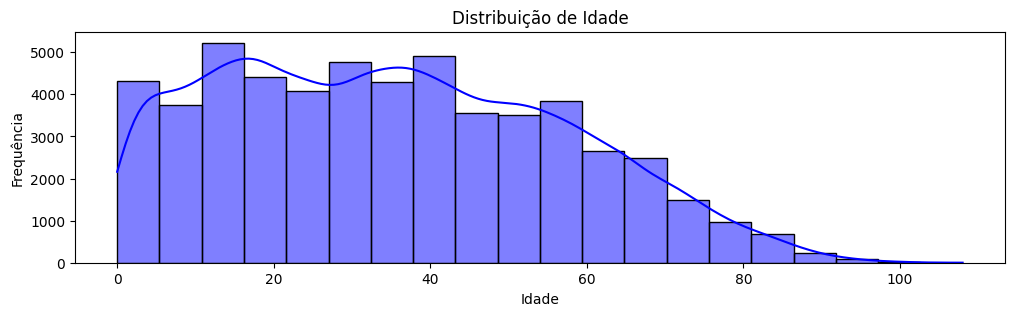

In [266]:
plt.figure(figsize=(12, 3))
sns.histplot(df['Idadenadatadereferência'], kde=True, color='blue', bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


### Renda média por nível de instrução

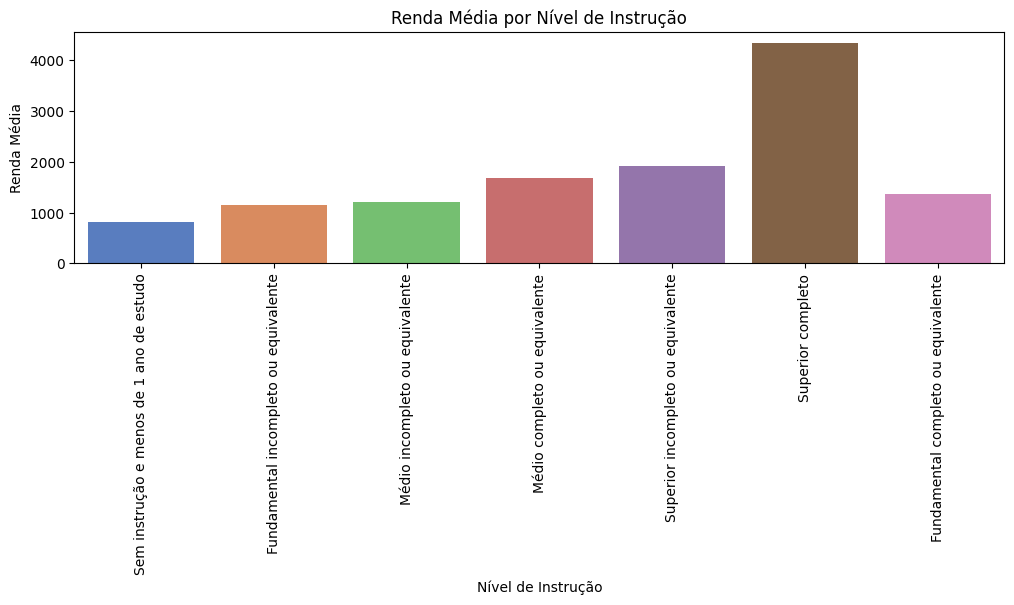

In [276]:
plt.figure(figsize=(12, 3))
sns.barplot(x='Níveldeinstrução', y='Valordorend.hab.emdinheiro', data=df, palette='muted', ci=None)
plt.title('Renda Média por Nível de Instrução')
plt.xlabel('Nível de Instrução')
plt.ylabel('Renda Média')
plt.xticks(rotation=90)
plt.show()


### Renda média por sexo

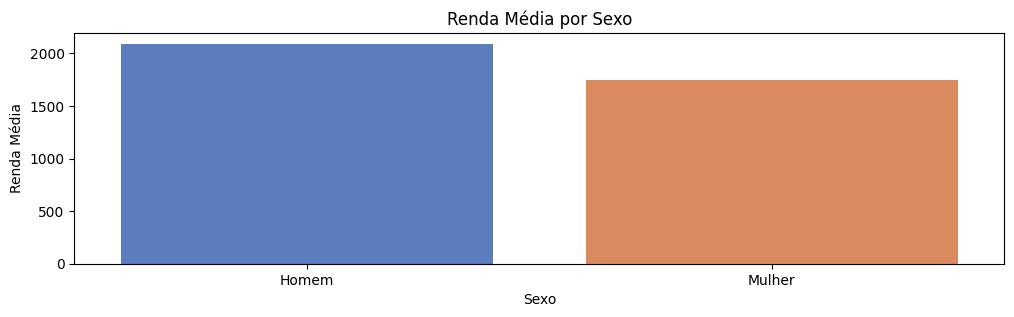

In [278]:
plt.figure(figsize=(12, 3))
sns.barplot(x='Sexo', y='Valordorend.hab.emdinheiro', data=df, palette='muted', ci=None)
plt.title('Renda Média por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Renda Média')
plt.show()


### Renda média por cor/raça

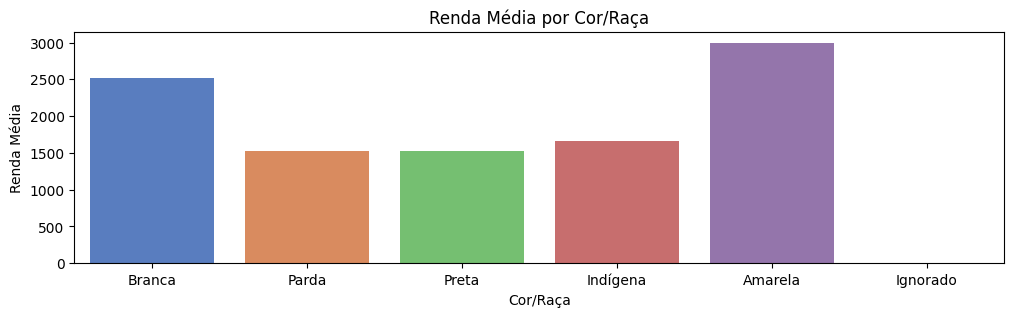

In [279]:
plt.figure(figsize=(12, 3))
sns.barplot(x='Corouraça', y='Valordorend.hab.emdinheiro', data=df, palette='muted', ci=None)
plt.title('Renda Média por Cor/Raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Renda Média')
plt.show()


### Distribuição de renda por unidade federativa

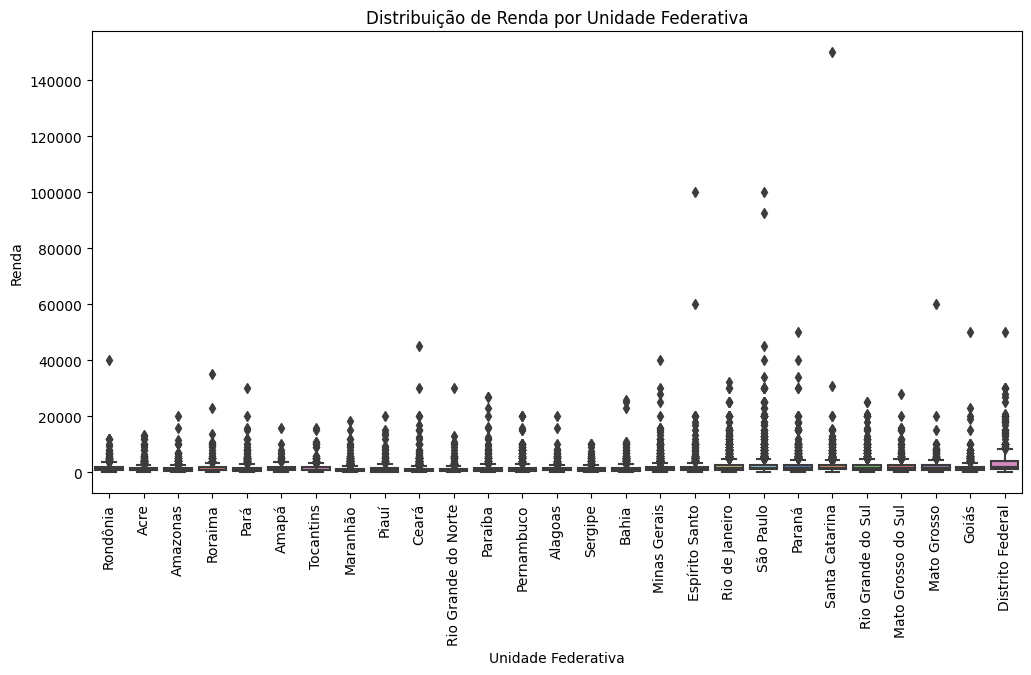

In [283]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='UF', y='Valordorend.hab.emdinheiro', data=df, palette='muted')
plt.title('Distribuição de Renda por Unidade Federativa')
plt.xlabel('Unidade Federativa')
plt.ylabel('Renda')
plt.xticks(rotation=90)
plt.show()


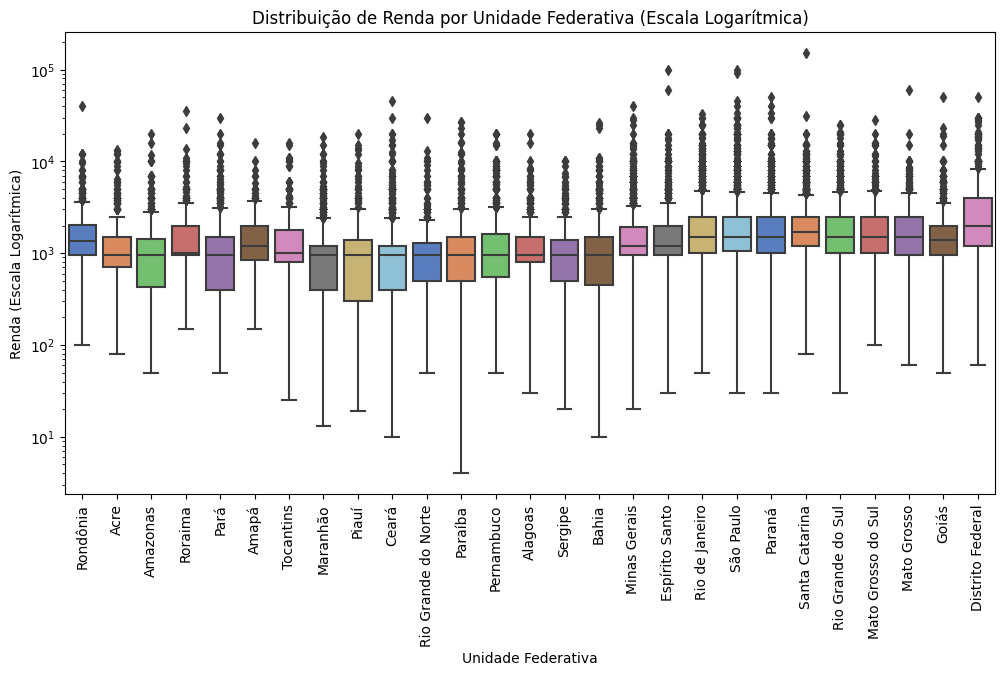

In [296]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='UF', y='Valordorend.hab.emdinheiro', data=df, palette='muted')
plt.title('Distribuição de Renda por Unidade Federativa (Escala Logarítmica)')
plt.xlabel('Unidade Federativa')
plt.ylabel('Renda (Escala Logarítmica)')
plt.xticks(rotation=90)
plt.yscale('log')  # Adiciona a escala logarítmica no eixo y
plt.show()


## Conclusão

Com base nos resultados obtidos, podemos inferir algumas conclusões:

1. Média de renda por UF:

    - O Distrito Federal possui a maior média de renda (R$ 3910,17), enquanto o Maranhão tem a menor média de renda (R$ 1139,85). Isso pode indicar uma maior disparidade de renda entre as diferentes regiões do país.

---
2. Média de renda por nível de instrução:

    - A média de renda aumenta conforme o nível de instrução aumenta. Pessoas com ensino superior completo têm a maior média de renda (R$ 4337,88), enquanto pessoas sem instrução e com menos de 1 ano de estudo possuem a menor média de renda (R$ 813,65). Isso sugere que a educação desempenha um papel importante na determinação da renda de um indivíduo.

---
3. Média de renda por sexo:

    - Homens têm uma média de renda maior (R$ 2091,49) do que as mulheres (R$ 1747,45). Isso pode indicar uma disparidade de gênero na distribuição de renda no país.
---

4. Média de renda por cor/raça:

    - A média de renda varia entre os diferentes grupos raciais. Pessoas de cor amarela têm a maior média de renda (R$ 2990,62), seguidas por brancos (R$ 2511,66), indígenas (R$ 1667,14), pardos (R$ 1529,05) e pretos (R$ 1527,96). Esses números sugerem que a cor/raça também pode influenciar a distribuição de renda no país.

É importante lembrar que essas são apenas análises iniciais dos dados e que outras técnicas estatísticas e de aprendizado de máquina podem ser aplicadas para explorar ainda mais essas relações e identificar padrões mais complexos. Além disso, correlação não implica causalidade, e outras variáveis podem estar afetando as tendências observadas.

## Previsão

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# retirando menores de idade
df_socioeconomico = df_socioeconomico.query('Idadenadatadereferência>=18')

# retirando aposentados (homens 65 anos e mulheres 62 anos)
df_socioeconomico = df_socioeconomico.query('not (Idadenadatadereferência >= 65 and Sexo == "Homem") and not (Idadenadatadereferência >= 62 and Sexo == "Mulher")')

# Codificar variáveis categóricas
le = LabelEncoder()
df_socioeconomico['Níveldeinstrução'] = le.fit_transform(df_socioeconomico['Níveldeinstrução'])
df_socioeconomico['Corouraça'] = le.fit_transform(df_socioeconomico['Corouraça'])
df_socioeconomico['Sexo'] = le.fit_transform(df_socioeconomico['Sexo'])
df_socioeconomico['UF'] = le.fit_transform(df_socioeconomico['UF'])

# Definir variáveis dependentes e independentes
X = df_socioeconomico.drop('Valordorend.hab.emdinheiro', axis=1)
y = df_socioeconomico['Valordorend.hab.emdinheiro']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar e testar o modelo de regressão linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Treinar e testar o modelo de árvore de decisão
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Calcular e exibir as métricas de desempenho dos modelos
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nMSE da regressão linear:", mse_lr)
print("MSE da árvore de decisão:", mse_dt)
print("R2 da regressão linear:", r2_lr)
print("R2 da árvore de decisão:", r2_dt)



MSE da regressão linear: 6597859.037309818
MSE da árvore de decisão: 12154283.8702782
R2 da regressão linear: 0.14510925589437584
R2 da árvore de decisão: -0.574841887826953


In [242]:
df_socioeconomico.describe().T

,count,mean,std,min,25%,50%,75%,max
Valordorend.hab.emdinheiro,21063.0,1943.751223,2839.327260,4.0,954.0,1200.0,2000.0,100000.0
Níveldeinstrução,21063.0,2.510896,1.765435,0.0,1.0,2.0,4.0,6.0
Idadenadatadereferência,21063.0,38.932868,11.705351,18.0,30.0,38.0,48.0,64.0
Corouraça,21063.0,2.238523,1.110282,0.0,1.0,3.0,3.0,4.0
Sexo,21063.0,0.414756,0.492692,0.0,0.0,0.0,1.0,1.0
UF,21063.0,14.093339,7.316672,0.0,8.0,13.0,20.0,26.0


In [243]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ORandomForestEstimator

# Inicializar o H2O
h2o.init()

# Converter o DataFrame do Pandas para o H2OFrame
h2o_df = h2o.H2OFrame(df_socioeconomico)

# Dividir os dados em treino e teste
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# Definir as variáveis independentes e dependentes
x = ['Níveldeinstrução', 'Idadenadatadereferência', 'Sexo', 'UF']
y = 'Valordorend.hab.emdinheiro'

# Criar o modelo de Regressão Linear
glm_model = H2OGeneralizedLinearEstimator(family='gaussian', model_id='glm_model')
glm_model.train(x=x, y=y, training_frame=train)

# Avaliar o modelo de Regressão Linear
glm_perf = glm_model.model_performance(test_data=test)
print("\nModelo de Regressão Linear - H2O")
print("MSE:", glm_perf.mse())
print("R2:", glm_perf.r2())

# Criar o modelo de Árvore de Decisão (Random Forest)
rf_model = H2ORandomForestEstimator(ntrees=100, max_depth=20, nfolds=5, model_id='rf_model')
rf_model.train(x=x, y=y, training_frame=train)

# Avaliar o modelo de Árvore de Decisão (Random Forest)
rf_perf = rf_model.model_performance(test_data=test)
print("\nModelo de Árvore de Decisão (Random Forest) - H2O")
print("MSE:", rf_perf.mse())
print("R2:", rf_perf.r2())

# Finalizar o H2O
h2o.cluster().shutdown()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\KAIQUE~1\AppData\Local\Temp\tmpwfni9d3c
  JVM stdout: C:\Users\KAIQUE~1\AppData\Local\Temp\tmpwfni9d3c\h2o_KAIQUEHENRIQUEVALIM_started_from_python.out
  JVM stderr: C:\Users\KAIQUE~1\AppData\Local\Temp\tmpwfni9d3c\h2o_KAIQUEHENRIQUEVALIM_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 10 hours and 38 minutes"
H2O_cluster_name:,H2O_from_python_KAIQUEHENRIQUEVALIM_ol5exf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.532 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

Modelo de Regressão Linear - H2O
MSE: 6466779.1744169155
R2: 0.10815585036457465
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

Modelo de Árvore de Decisão (Random Forest) - H2O
MSE: 5825065.568941758
R2: 0.19665562890171295
H2O session _sid_b462 closed.


In [244]:
from scipy.stats import ttest_ind

# Separar renda de homens e mulheres
renda_homem = df_socioeconomico[df_socioeconomico['Sexo'] == 0]['Valordorend.hab.emdinheiro']
renda_mulher = df_socioeconomico[df_socioeconomico['Sexo'] == 1]['Valordorend.hab.emdinheiro']

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(renda_homem, renda_mulher)

# Exibir os resultados
print("\nResultado do teste t de Student:")
print("Estatística t:", t_stat)
print("Valor p:", p_value)

# Estabelecer o nível de significância
alpha = 0.05

# Verificar a diferença significativa
if p_value < alpha:
    print("Há uma diferença significativa na renda média entre homens e mulheres.")
else:
    print("Não há uma diferença significativa na renda média entre homens e mulheres.")



Resultado do teste t de Student:
Estatística t: 8.848040531328605
Valor p: 9.59504707042645e-19
Há uma diferença significativa na renda média entre homens e mulheres.


# Taxas de Desemprego e Participação na Força de Trabalho

- Taxa de desemprego por UF
- Taxa de desemprego por faixa etária
- Taxa de desemprego por gênero
- Taxa de desemprego por nível de educação
- Taxa de desalentados por UF

In [245]:
df_desempregados = df[['Condiçãoemrelaçãoforçadtrab', 'Níveldeinstrução', 'Idadenadatadereferência', 'Pessoasdesalentadas', 'Sexo', 'UF']]
df_desempregados['Pessoasdesalentadas'] = df_desempregados['Pessoasdesalentadas'].fillna('Procura emprego ativamente')

# retirando menores de idade
df_desempregados = df_desempregados.query('Idadenadatadereferência>=18')

# retirando aposentados (homens 65 anos e mulheres 62 anos)
df_desempregados = df_desempregados.query('not (Idadenadatadereferência >= 65 and Sexo == "Homem") and not (Idadenadatadereferência >= 62 and Sexo == "Mulher")')

df_desempregados = df_desempregados.dropna().reset_index(drop = True)
df_desempregados

,Condiçãoemrelaçãoforçadtrab,Níveldeinstrução,Idadenadatadereferência,Pessoasdesalentadas,Sexo,UF
0,Pessoas fora da força de trabalho,Médio incompleto ou equivalente,21,Procura emprego ativamente,Homem,Rondônia
1,Pessoas na força de trabalho,Médio completo ou equivalente,27,Procura emprego ativamente,Homem,Rondônia
2,Pessoas na força de trabalho,Superior incompleto ou equivalente,24,Procura emprego ativamente,Mulher,Rondônia
3,Pessoas na força de trabalho,Médio completo ou equivalente,39,Procura emprego ativamente,Mulher,Rondônia
4,Pessoas na força de trabalho,Superior completo,42,Procura emprego ativamente,Homem,Rondônia
...,...,...,...,...,...,...
34286,Pessoas na força de trabalho,Superior completo,37,Procura emprego ativamente,Mulher,Distrito Federal
34287,Pessoas fora da força de trabalho,Superior completo,23,Procura emprego ativamente,Mulher,Distrito Federal
34288,Pessoas fora da força de trabalho,Médio completo ou equivalente,29,Procura emprego ativamente,Mulher,Distrito Federal
34289,Pessoas fora da força de trabalho,Médio incompleto ou equivalente,27,Procura emprego ativamente,Homem,Distrito Federal


## Análises Básicas

### Função para calcular a taxa de desemprego

In [246]:
def taxa_desemprego(df_desempregados, grupo_col):
    total = df_desempregados.groupby(grupo_col).size()
    desempregados = df_desempregados[df_desempregados['Condiçãoemrelaçãoforçadtrab'] == 'Pessoas fora da força de trabalho'].groupby(grupo_col).size()
    return (desempregados / total) * 100

### Taxa de desemprego por UF

In [247]:
taxa_desemprego_uf = taxa_desemprego(df_desempregados, 'UF')
print("Taxa de desemprego por UF:\n", taxa_desemprego_uf)


Taxa de desemprego por UF:
 UF
Acre                   34.961832
Alagoas                48.346457
Amapá                  31.270358
Amazonas               26.610348
Bahia                  32.492114
Ceará                  33.795494
Distrito Federal       23.861852
Espírito Santo         22.573007
Goiás                  25.719268
Maranhão               42.940385
Mato Grosso            23.623011
Mato Grosso do Sul     24.807198
Minas Gerais           24.865900
Paraná                 25.102459
Paraíba                37.073707
Pará                   29.321486
Pernambuco             34.142857
Piauí                  35.151515
Rio Grande do Norte    36.283186
Rio Grande do Sul      20.382883
Rio de Janeiro         24.959936
Rondônia               30.085470
Roraima                25.790754
Santa Catarina         21.369485
Sergipe                29.323308
São Paulo              21.273463
Tocantins              28.066528
dtype: float64


### Taxa de desemprego por faixa etária

In [248]:
taxa_desemprego_idade = taxa_desemprego(df_desempregados, 'Idadenadatadereferência')
print("Taxa de desemprego por faixa etária:\n", taxa_desemprego_idade)

Taxa de desemprego por faixa etária:
 Idadenadatadereferência
18    50.890052
19    39.955107
20    33.049818
21    30.996310
22    35.547786
23    27.294982
24    25.826972
25    26.328502
26    23.027990
27    20.187166
28    23.119777
29    21.568627
30    21.995192
31    18.633540
32    20.176406
33    20.186698
34    19.974716
35    20.093458
36    20.962567
37    19.506463
38    19.107551
39    22.572816
40    20.789779
41    20.905459
42    21.208531
43    20.184697
44    25.584594
45    21.686747
46    22.008253
47    24.137931
48    26.657459
49    31.044349
50    28.074866
51    29.525223
52    28.052326
53    33.380481
54    35.744681
55    38.461538
56    40.829346
57    42.589704
58    45.324881
59    46.790541
60    54.545455
61    61.423221
62    38.197425
63    50.854701
64    49.367089
dtype: float64


### Taxa de desemprego por gênero

In [249]:
taxa_desemprego_genero = taxa_desemprego(df_desempregados, 'Sexo')
print("Taxa de desemprego por gênero:\n", taxa_desemprego_genero)

Taxa de desemprego por gênero:
 Sexo
Homem     18.359788
Mulher    38.990799
dtype: float64


### Taxa de desemprego por nível de educação

In [250]:
taxa_desemprego_educacao = taxa_desemprego(df_desempregados, 'Níveldeinstrução')
print("Taxa de desemprego por nível de educação:\n", taxa_desemprego_educacao)

Taxa de desemprego por nível de educação:
 Níveldeinstrução
Fundamental completo ou equivalente         30.614370
Fundamental incompleto ou equivalente       36.323988
Médio completo ou equivalente               23.036749
Médio incompleto ou equivalente             32.997988
Sem instrução e menos de 1 ano de estudo    55.473006
Superior completo                           11.977425
Superior incompleto ou equivalente          27.638960
dtype: float64


### Taxa de desalentados por UF

In [251]:
desalentados_uf = df_desempregados[df_desempregados['Pessoasdesalentadas'] == 'Pessoas desalentadas'].groupby('UF').size() / df_desempregados.groupby('UF').size() * 100
print("Taxa de desalentados por UF:\n", desalentados_uf)

Taxa de desalentados por UF:
 UF
Acre                    7.786260
Alagoas                11.968504
Amapá                   1.954397
Amazonas                3.167899
Bahia                   8.328076
Ceará                   6.932409
Distrito Federal        0.784929
Espírito Santo          1.104972
Goiás                   1.743679
Maranhão               13.491708
Mato Grosso             0.979192
Mato Grosso do Sul      2.056555
Minas Gerais            3.026820
Paraná                  0.614754
Paraíba                 9.130913
Pará                    5.654281
Pernambuco              5.928571
Piauí                   8.969697
Rio Grande do Norte     8.702065
Rio Grande do Sul       1.238739
Rio de Janeiro          0.641026
Rondônia                1.196581
Roraima                 3.163017
Santa Catarina          0.643382
Sergipe                 6.315789
São Paulo               1.067354
Tocantins               3.742204
dtype: float64


## Plots

### Distribuição de idade

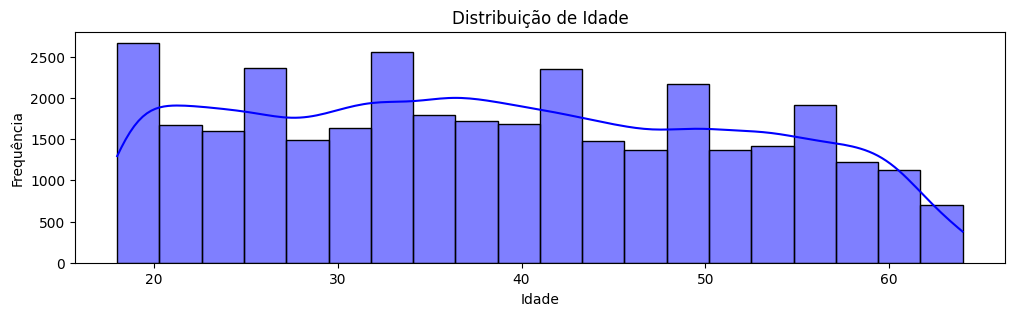

In [286]:
plt.figure(figsize=(12, 3))
sns.histplot(df_desempregados['Idadenadatadereferência'], kde=True, color='blue', bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


### Contagem de pessoas por nível de instrução

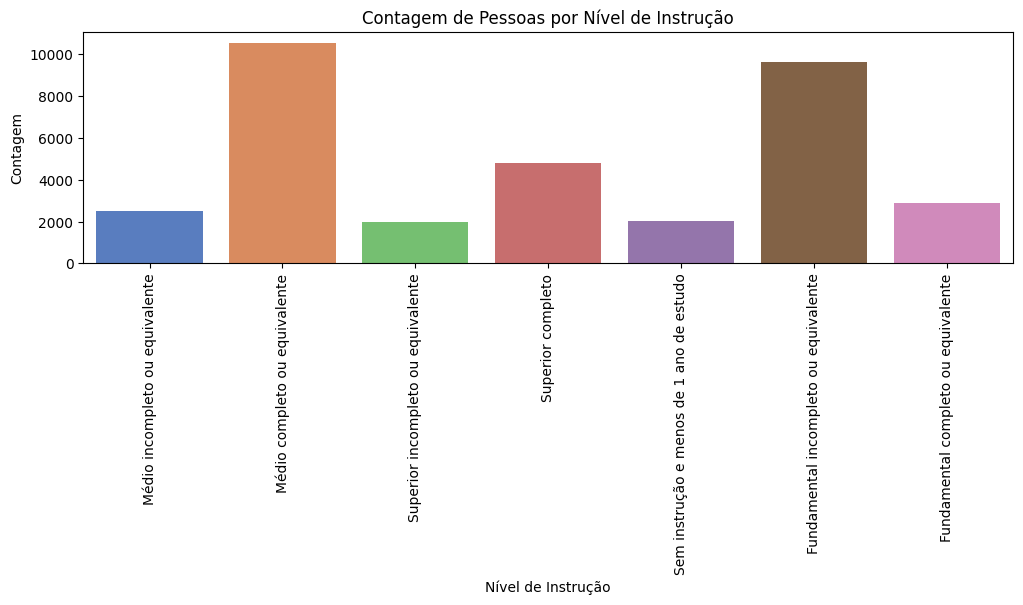

In [288]:
plt.figure(figsize=(12, 3))
sns.countplot(x='Níveldeinstrução', data=df_desempregados, palette='muted')
plt.title('Contagem de Pessoas por Nível de Instrução')
plt.xlabel('Nível de Instrução')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()


### Contagem de pessoas por sexo

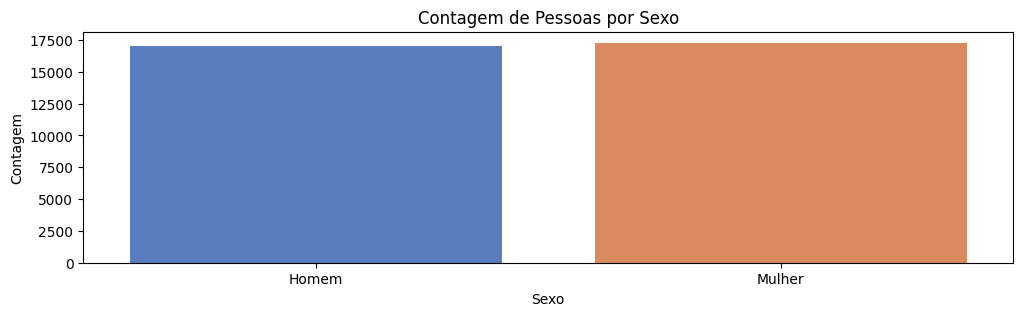

In [289]:
plt.figure(figsize=(12, 3))
sns.countplot(x='Sexo', data=df_desempregados, palette='muted')
plt.title('Contagem de Pessoas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()


### Contagem de pessoas por condição em relação à força de trabalho

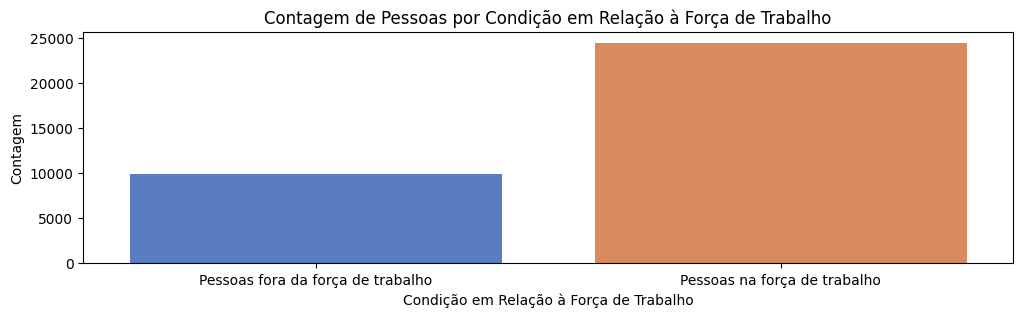

In [291]:
plt.figure(figsize=(12, 3))
sns.countplot(x='Condiçãoemrelaçãoforçadtrab', data=df_desempregados, palette='muted')
plt.title('Contagem de Pessoas por Condição em Relação à Força de Trabalho')
plt.xlabel('Condição em Relação à Força de Trabalho')
plt.ylabel('Contagem')
plt.show()


### Contagem de pessoas desalentadas por unidade federativa

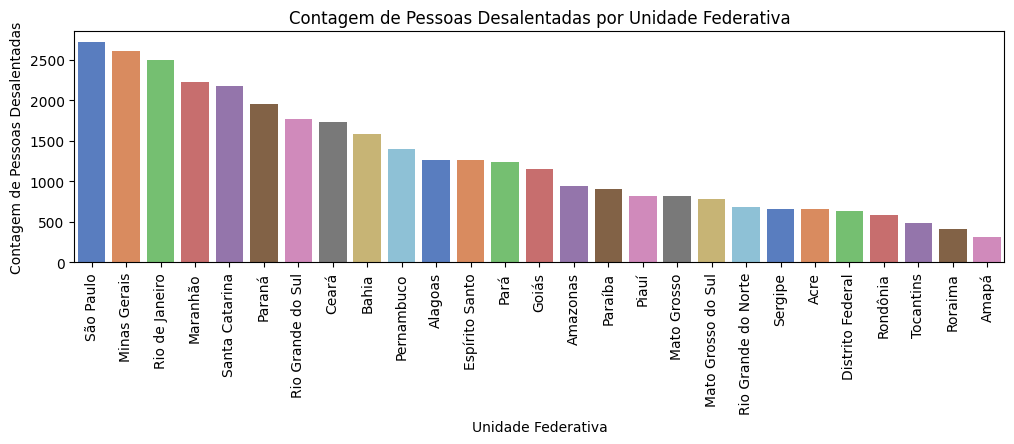

In [294]:
plt.figure(figsize=(12, 3))
sns.countplot(x='UF', data=df_desempregados, palette='muted', order=df_desempregados['UF'].value_counts().index)
plt.title('Contagem de Pessoas Desalentadas por Unidade Federativa')
plt.xlabel('Unidade Federativa')
plt.ylabel('Contagem de Pessoas Desalentadas')
plt.xticks(rotation=90)
plt.show()


## Conclusão

Com base nos resultados, podemos tirar algumas inferências sobre os dados de desemprego:

1. Taxa de desemprego por UF

    - Alagoas possui a maior taxa de desemprego (48,35%), enquanto o Rio Grande do Sul tem a menor taxa (20,38%). Isso indica que há uma grande variação no desemprego entre os estados brasileiros.

---

2. Taxa de desemprego por faixa etária

    - A taxa de desemprego tende a ser maior para os jovens, especialmente aqueles com 18 anos (50,89%). À medida que a idade aumenta, a taxa de desemprego geralmente diminui, mas começa a aumentar novamente após os 50 anos, chegando a 61,42% aos 61 anos. Isso pode ser devido à dificuldade que os trabalhadores mais velhos enfrentam para encontrar empregos compatíveis com suas habilidades e experiências.
---
3. Taxa de desemprego por gênero

    - As mulheres têm uma taxa de desemprego significativamente maior (38,99%) em comparação aos homens (18,36%). Isso pode ser resultado de fatores culturais, sociais e econômicos que afetam as oportunidades de emprego para as mulheres.
---
4. Taxa de desemprego por nível de educação

    - Aqueles com educação superior completa têm a menor taxa de desemprego (11,98%), enquanto os indivíduos sem instrução ou com menos de um ano de estudo têm a maior taxa (55,47%). Isso sugere que a educação tem um impacto significativo nas chances de uma pessoa encontrar emprego.
---
5. Taxa de desalentados por UF
    
    - Maranhão tem a maior taxa de desalentados (13,49%), enquanto o Distrito Federal tem a menor taxa (0,78%). Os desalentados são pessoas que desistiram de procurar emprego devido a razões como falta de experiência, qualificação ou oportunidades.

Essas informações podem ajudar a orientar políticas e programas voltados para a redução do desemprego e a melhoria das condições de trabalho em diferentes estados e grupos demográficos.

## Previsão

In [252]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Criando a coluna 'Empregado' com valores binários
df_desempregados['Empregado'] = df_desempregados['Condiçãoemrelaçãoforçadtrab'].apply(lambda x: 1 if x == 'Pessoas na força de trabalho' else 0)

# One-Hot Encoding das variáveis categóricas
df_desempregados_encoded = pd.get_dummies(df_desempregados, columns=['Níveldeinstrução', 'Pessoasdesalentadas', 'Sexo', 'UF'])

# Dividindo o conjunto de dados em treinamento e teste
X = df_desempregados_encoded.drop(['Condiçãoemrelaçãoforçadtrab', 'Empregado'], axis=1)
y = df_desempregados_encoded['Empregado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressão Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Árvore de Decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Avaliando os modelos
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("Acurácia da Árvore de Decisão:", accuracy_score(y_test, y_pred_tree))

print("\nRelatório de Classificação da Regressão Logística:")
print(classification_report(y_test, y_pred_logreg))

print("\nRelatório de Classificação da Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))

print("\nMatriz de Confusão da Regressão Logística:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nMatriz de Confusão da Árvore de Decisão:")
print(confusion_matrix(y_test, y_pred_tree))


Acurácia da Regressão Logística: 0.7713841368584758
Acurácia da Árvore de Decisão: 0.7199650077760498

Relatório de Classificação da Regressão Logística:
              precision    recall  f1-score   support

           0       0.77      0.30      0.44      3001
           1       0.77      0.96      0.86      7287

    accuracy                           0.77     10288
   macro avg       0.77      0.63      0.65     10288
weighted avg       0.77      0.77      0.73     10288


Relatório de Classificação da Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      3001
           1       0.80      0.80      0.80      7287

    accuracy                           0.72     10288
   macro avg       0.66      0.66      0.66     10288
weighted avg       0.72      0.72      0.72     10288


Matriz de Confusão da Regressão Logística:
[[ 915 2086]
 [ 266 7021]]

Matriz de Confusão da Árvore de Decisão:
[[1590 1411]
 [1470 5817]]


In [258]:
# H2O AutoML
import h2o
from h2o.automl import H2OAutoML

# Inicializando o cluster H2O
h2o.init()

# Convertendo o DataFrame do pandas para um objeto H2OFrame
data_h2o = h2o.H2OFrame(df_desempregados_encoded)

# Dividindo os dados em conjuntos de treinamento e teste
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

# Especificando a coluna alvo e as colunas de entrada
x = list(df_desempregados_encoded.drop(['Condiçãoemrelaçãoforçadtrab', 'Empregado'], axis=1).columns)
y = 'Empregado'

# Convertendo a coluna alvo em categórica
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Executando o AutoML
automl = H2OAutoML(max_models=20, seed=42, max_runtime_secs=3600)
automl.train(x=x, y=y, training_frame=train)

lb = h2o.automl.get_leaderboard(automl, extra_columns = "ALL")

# Exibindo o melhor modelo
best_model = automl.leader
print(f'Melhor Modelo: {best_model}')

# Fazendo previsões com o melhor modelo
y_pred_automl = best_model.predict(test)

# Convertendo as previsões para um DataFrame do pandas
y_pred_automl_df = y_pred_automl.as_data_frame()

# Convertendo os conjuntos de teste e alvo em DataFrames do pandas
y_test_df = test[y].as_data_frame()
X_test_df = test.as_data_frame().drop(y, axis=1)

# Convertendo as previsões para um DataFrame do pandas
y_pred_automl_df = y_pred_automl['predict'].as_data_frame()

# Convertendo os conjuntos de teste e alvo em DataFrames do pandas
y_test_df = test[y].as_data_frame()
X_test_df = test.as_data_frame().drop(y, axis=1)

lb = h2o.automl.get_leaderboard(automl, extra_columns = "ALL")
m = automl.leader

lb

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,46 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"21 days, 10 hours and 50 minutes"
H2O_cluster_name:,H2O_from_python_KAIQUEHENRIQUEVALIM_tuzyak
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.923 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
02:08:38.884: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Melhor Modelo: Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230331_20838


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       9/20
# GBM base models (used / total)           4/10
# DeepLearning base models (used / total)  5/7
# DRF base models (used / total)           0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_colu

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20230331_20838,0.808852,0.451498,0.902124,0.347219,0.384278,0.147669,5801,0.025362,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230331_20838,0.808118,0.452129,0.901171,0.354904,0.384491,0.147833,5389,0.013148,StackedEnsemble
GBM_1_AutoML_1_20230331_20838,0.807323,0.453278,0.900648,0.361665,0.384805,0.148075,736,0.012043,GBM
GBM_2_AutoML_1_20230331_20838,0.807283,0.453643,0.900925,0.356184,0.384961,0.148195,325,0.008646,GBM
GBM_5_AutoML_1_20230331_20838,0.807077,0.453794,0.900928,0.36076,0.385054,0.148266,318,0.008154,GBM
GBM_grid_1_AutoML_1_20230331_20838_model_1,0.806512,0.454659,0.900557,0.354455,0.385413,0.148543,289,0.008584,GBM
GBM_3_AutoML_1_20230331_20838,0.806175,0.454678,0.900541,0.348427,0.385576,0.148669,339,0.00854,GBM
GBM_grid_1_AutoML_1_20230331_20838_model_5,0.804661,0.456301,0.899882,0.355916,0.38633,0.149251,321,0.008384,GBM
GBM_4_AutoML_1_20230331_20838,0.803911,0.457175,0.898898,0.352274,0.386672,0.149515,359,0.008635,GBM
GBM_grid_1_AutoML_1_20230331_20838_model_2,0.801851,0.458959,0.897763,0.362114,0.387567,0.150208,381,0.008334,GBM


In [259]:
m

key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/20
# GBM base models (used / total),4/10
# DeepLearning base models (used / total),5/7
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Após a análise comparativa dos resultados obtidos com o modelo de regressão anterior e a implementação do H2O, constatou-se que a acurácia não apresentou um aumento significativo, mantendo-se em torno de 0.7849154 para o modelo H2O (StackedEnsemble_AllModels_1_AutoML_1_20230331_20838) e 0.77 para o modelo de regressão logística.